In [166]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [167]:
fraud_data = pd.read_csv('creditcard.csv')

In [168]:
fraud_data.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [169]:
fraud_data.shape

(284807, 31)

In [170]:
fraud_data[['Class']].nunique()

Class    2
dtype: int64

In [171]:
Counter(fraud_data['Class'])

Counter({0: 284315, 1: 492})

In [90]:
fraud_data.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [91]:
fraud_data.describe()
#Data is standard scaled and numeric data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [92]:
fraud_data.isna().sum()
# no null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [93]:
cols = fraud_data.columns

In [94]:
for x,y in enumerate(cols):
    print (x,y)
    

0 Time
1 V1
2 V2
3 V3
4 V4
5 V5
6 V6
7 V7
8 V8
9 V9
10 V10
11 V11
12 V12
13 V13
14 V14
15 V15
16 V16
17 V17
18 V18
19 V19
20 V20
21 V21
22 V22
23 V23
24 V24
25 V25
26 V26
27 V27
28 V28
29 Amount
30 Class


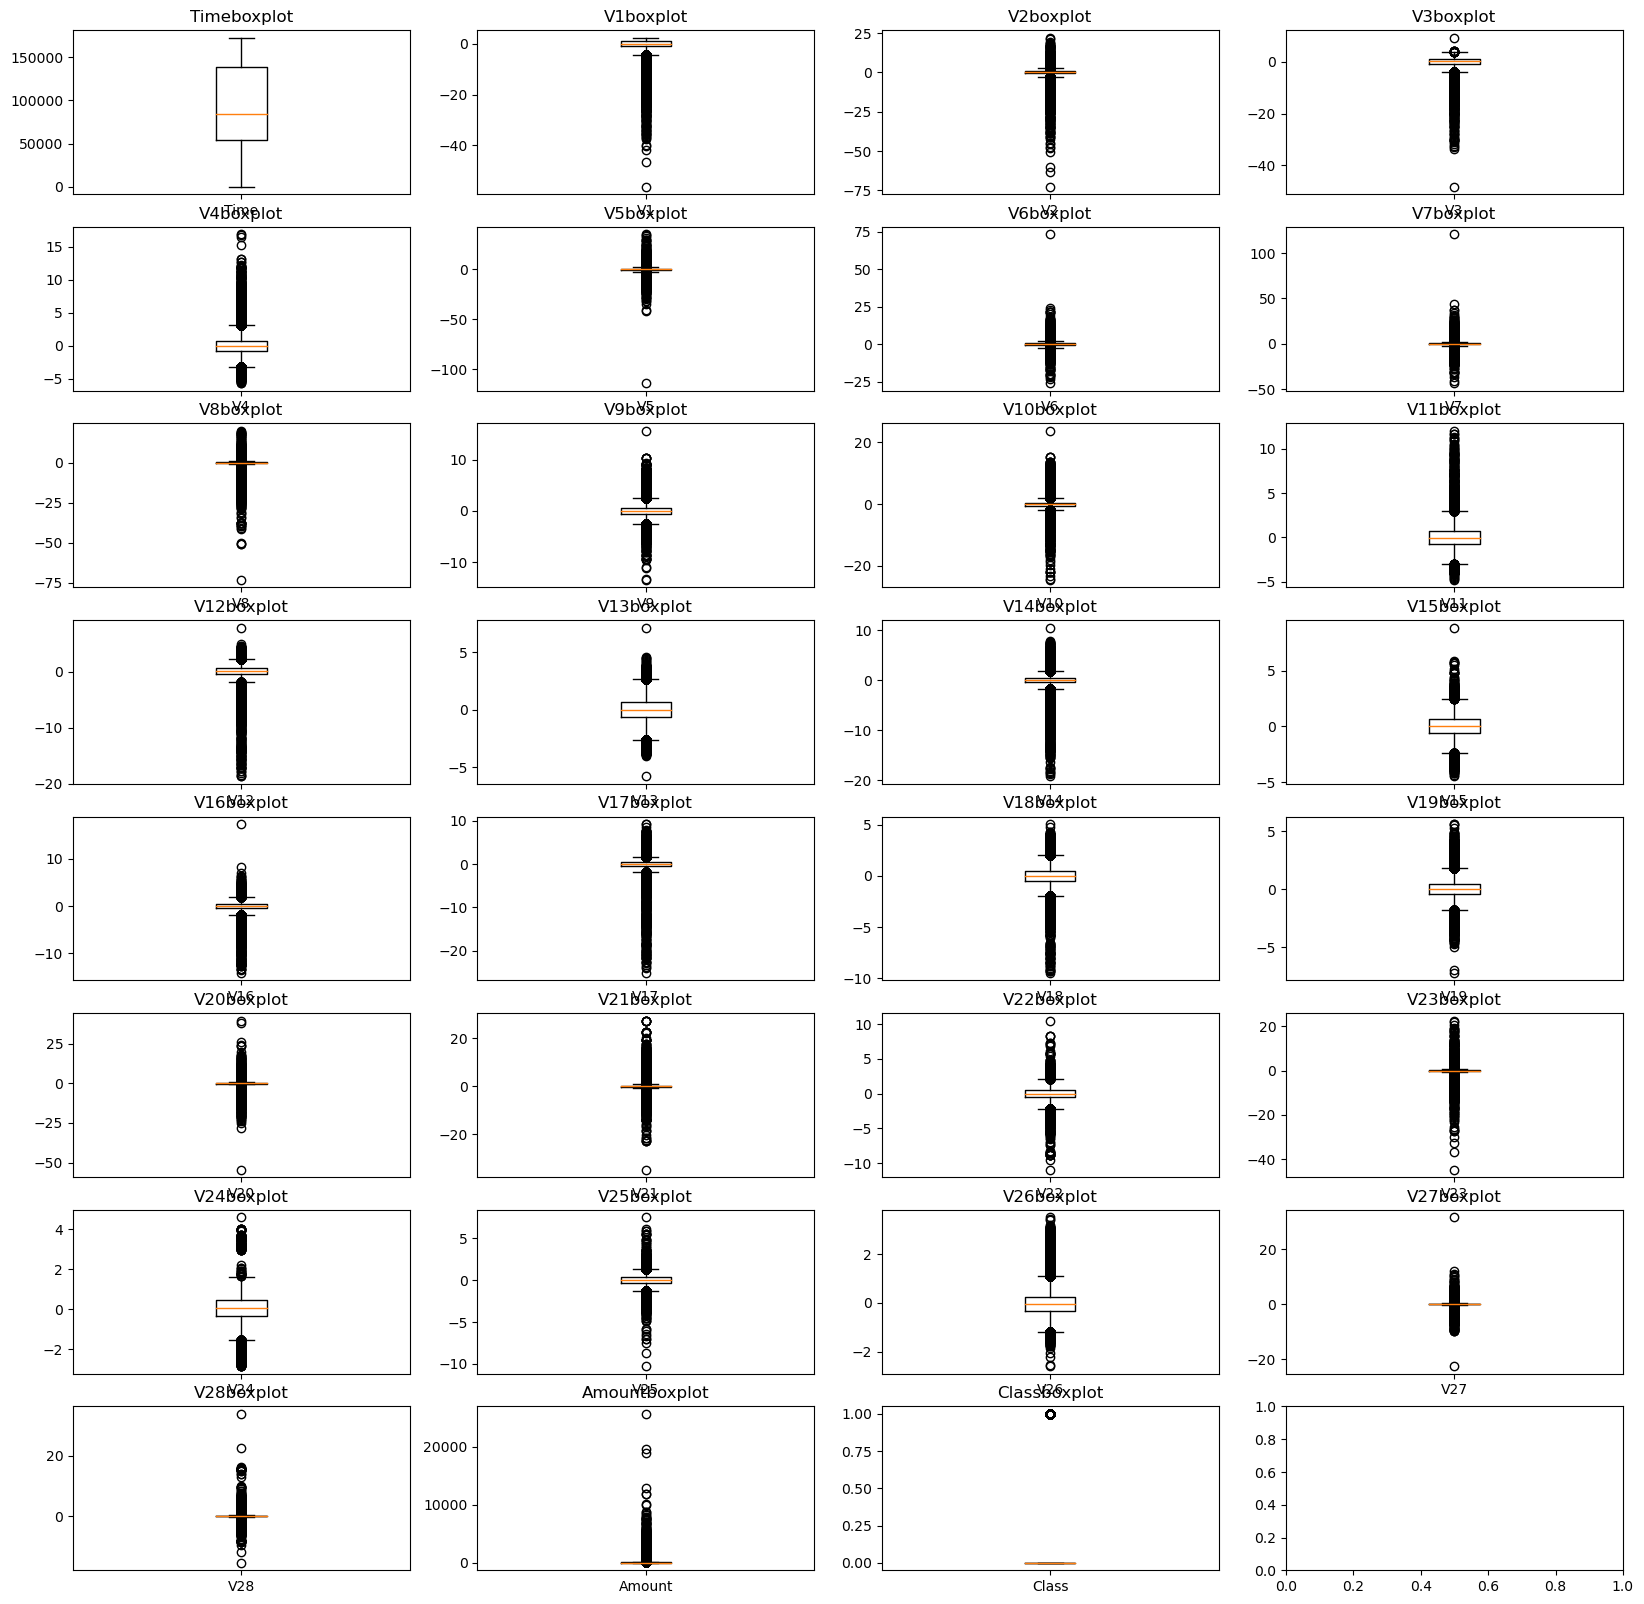

In [95]:
fig,axes = plt.subplots(8,4,figsize=(20, 20))
for x,y in enumerate(cols):
    ax = plt.subplot(8,4,x+1)
    plt.boxplot(fraud_data[y])
    plt.title(y+'boxplot')
    plt.xticks([1], [y])
    


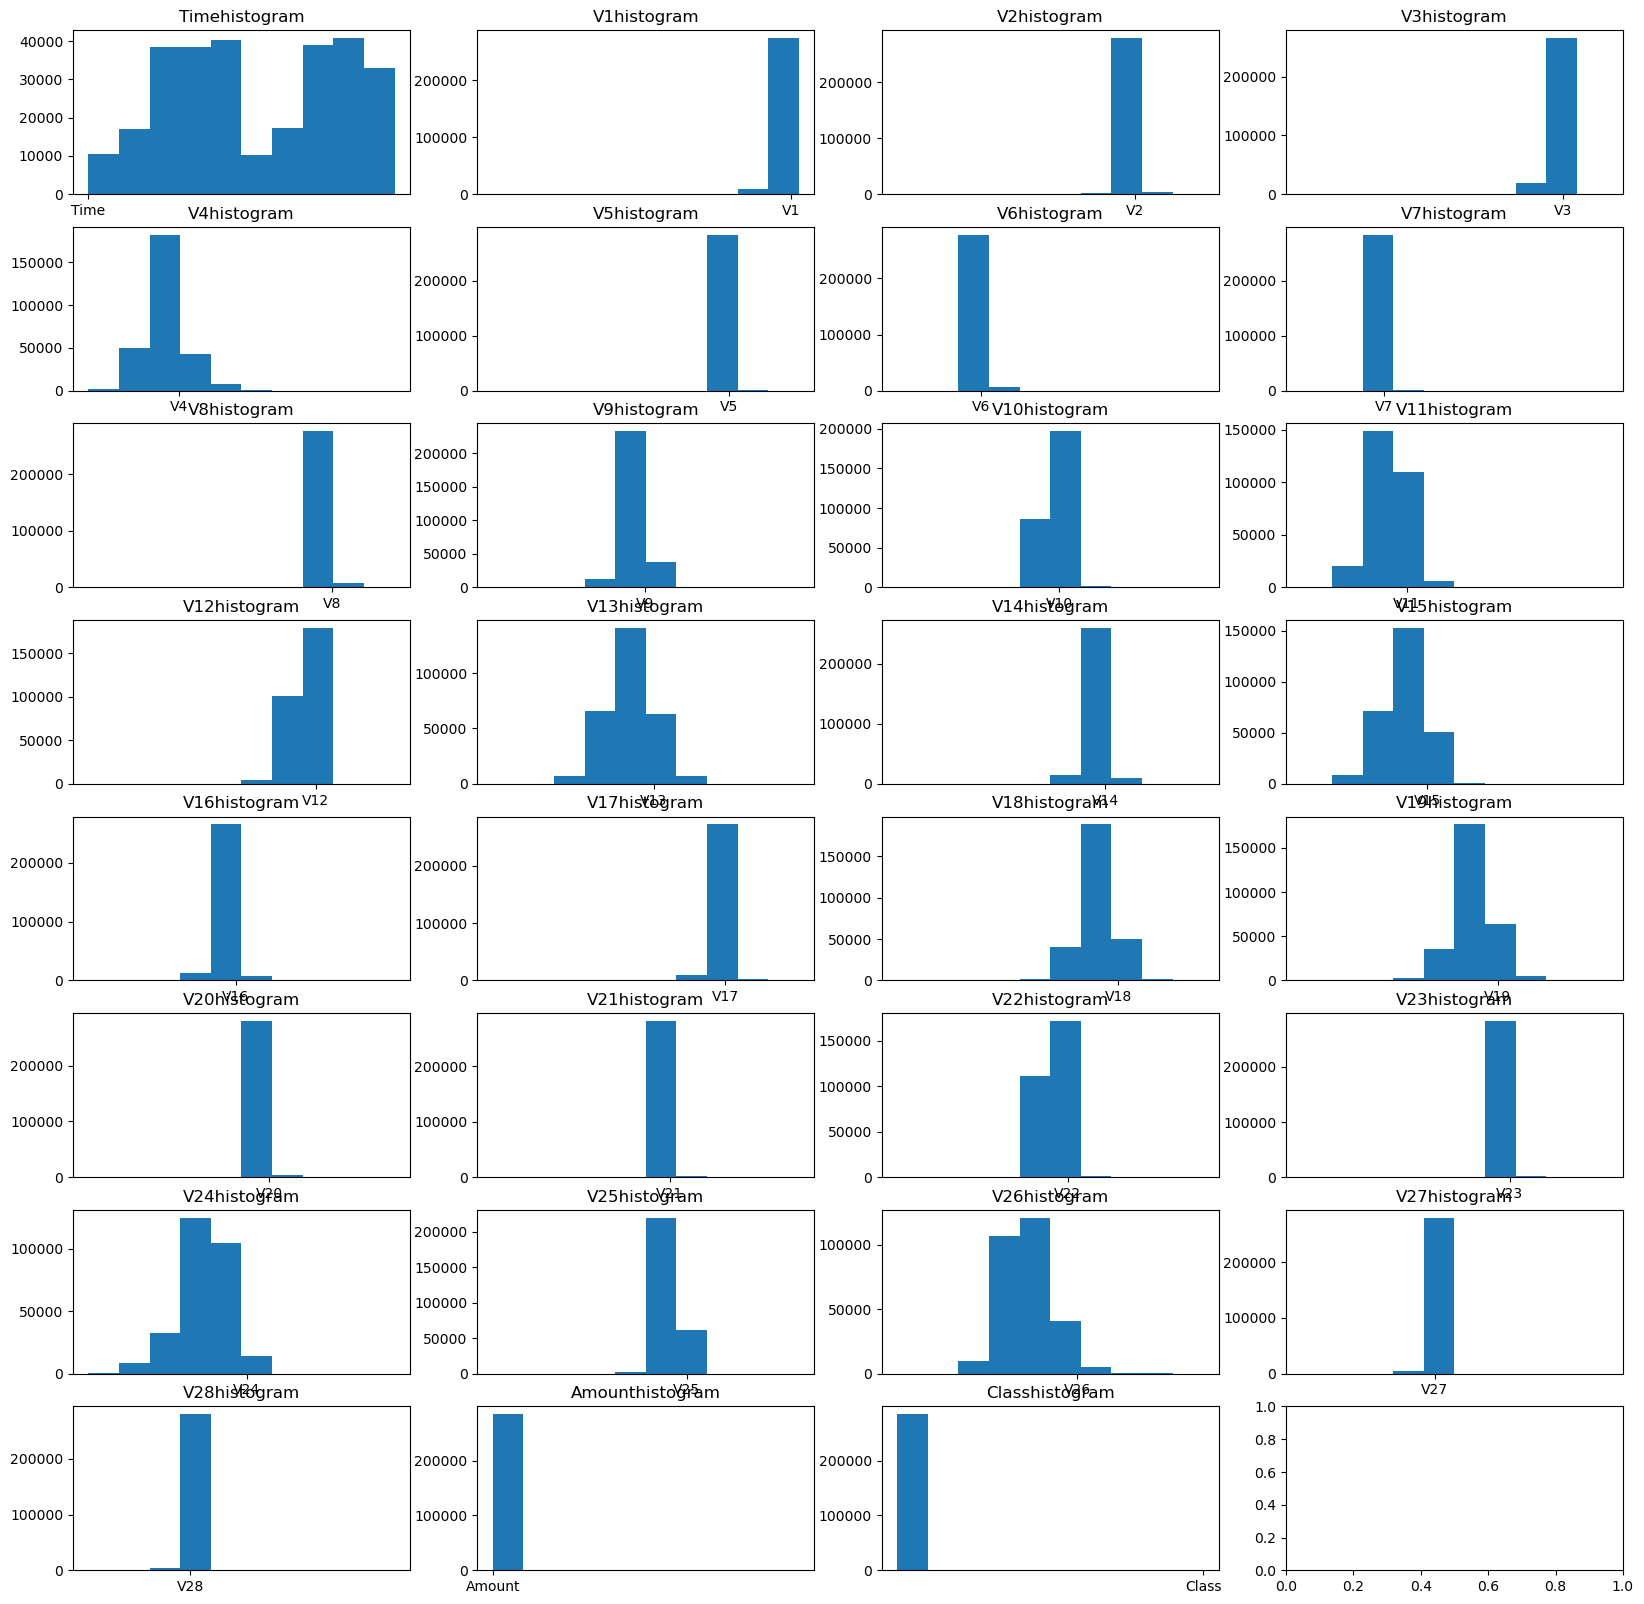

In [96]:
fig,axes = plt.subplots(8,4,figsize=(20, 20))
for x,y in enumerate(cols):
    ax = plt.subplot(8,4,x+1)
    plt.hist(fraud_data[y])
    plt.title(y+'histogram')
    plt.xticks([1], [y])

## Most of the variables have extreme outliers. Considering the lack of information about these variables, it is advisable to use Standard Scaler. In order to avoid data leak, i.e. to ensure that the model has no information about the test data, we will first split the data.

In [172]:
# Extracting Target from the data

features = fraud_data.drop('Class', axis = 1)
target = fraud_data[['Class']]

In [173]:
print(features.shape)
print(target.shape)

(284807, 30)
(284807, 1)


In [174]:
#Splitting train and test data
X_train, X_test,y_train, y_test = train_test_split(features, target, train_size=0.75, random_state=42)

In [175]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(213605, 30)
(71202, 30)
(213605, 1)
(71202, 1)


########################STEPS TO BE FOLLOWED ##########################################
### Step 1: Scaling and Standardizing the data
### Step 2: BASE MODEL - Fitting LogisticRegression Model to the unbalanced data
### Step 3: Applying SMOTE technique (SMOTE/KmeansSMOTE/SVMSMOTE) to balance the data. Using the best method to balance minority class for this dataset.
SMOTE-Synthetic Minority Oversampling Technique helps in balancing data (https://medium.com/analytics-vidhya/handling-imbalanced-data-by-oversampling-with-smote-and-its-variants-23a4bf188eaf)
### Step 4: BALANCED CLASSIFICTION MODEL - Fitting Classification Model (LogisticRegression Model and Random Forest Classifier) to the balanced data obtained from balancing technique (SMOTE/KmeansSMOTE/SVMSMOTE)
### Step 5: COMBINATION MODEL - Fitting a combination of Clustering (KMeans) and Classification Model (Logistic and RandomForest) on the balanced data using the best balancing technique arrived at using previous step.
### Step 6: Evaluating results obtained from the three different models (BASE, BALANCED CLASSFICATION and COMBINATION) 

##########################################################
## Step 1: Scaling and Standardizing train and test data
In order to avoid data leak, we will fit the Standard Scaler on train data and  transform both train and test using the fitted scaler. This will ensure that the model has no information on the test data.
##########################################################

In [176]:
# instantiating standard scaler
sc = StandardScaler()

In [177]:
train_cols = X_train.columns

In [178]:
# fitting the scaler to train data
sc.fit(X_train)

StandardScaler()

In [179]:
#transforming X_train
X_train = sc.transform(X_train)

In [180]:
X_train_scaled = pd.DataFrame(X_train, columns = train_cols)

In [181]:
X_train_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.738270,-0.839525,0.738476,0.903933,-1.225050,-0.022385,-0.360859,0.733149,-0.366328,0.894308,...,0.492653,-0.296680,-0.278404,-0.336970,0.019678,-0.580513,1.310067,-0.649827,-0.301131,-0.196016
1,-1.035079,-0.119171,-0.295057,0.815902,-1.650872,-0.845845,0.662798,-1.569722,-1.979526,-2.456284,...,0.467615,-2.029197,-0.112627,0.117688,-0.572514,1.039982,-0.897937,0.221376,0.636827,-0.107223
2,-1.331382,0.578554,-0.463885,-0.107754,-0.376453,-0.435164,-0.181778,-0.171586,0.035603,-1.036422,...,-0.508658,-0.929280,-2.552927,0.271625,-0.639301,-0.118141,0.508106,-0.150764,0.035818,0.086696
3,-0.302019,0.035867,0.612165,0.681581,0.977236,0.158982,-0.231369,0.476156,-0.105579,-0.639943,...,0.190673,0.130723,0.511181,-0.346850,-0.205367,-0.092799,-0.233999,0.283569,0.197976,-0.306794
4,-1.168730,-0.101168,0.367405,-0.075460,0.181137,1.642945,2.996328,-0.100290,0.871756,-0.069786,...,0.375641,-0.027646,0.229595,-0.128257,1.685937,-0.573331,-0.558663,1.192034,0.763390,-0.260020


In [182]:
# transforming X_test using the fitted scaler
X_test = sc.transform(X_test)

In [183]:
X_test
# StandardScaler on the whole dataframe gives back an array which needs to be converted back into a DataFrame

array([[-1.12233335e+00, -8.41997978e+00,  5.15554636e+00, ...,
        -4.99174151e+00, -3.13684970e+00,  1.07379429e+00],
       [-1.06429005e+00,  1.73587283e-01, -1.64624981e+00, ...,
         1.01928040e-01,  3.06049476e-01,  1.68158991e+00],
       [-1.24913984e+00,  7.13555446e-01, -3.53555677e-01, ...,
         2.87539667e-02,  1.31260321e-02, -2.24938641e-01],
       ...,
       [ 8.04152307e-01,  9.54488939e-01, -3.78560266e-01, ...,
        -2.36518895e-01, -1.38199366e-01,  4.25640089e-03],
       [ 5.53298278e-01, -6.81442140e-01,  6.50875937e-01, ...,
        -7.52756086e-01, -6.43356366e-01, -2.67815265e-01],
       [-4.81140253e-01,  7.50664156e-01, -6.69168851e-01, ...,
         1.23320808e-01,  4.47804066e-02, -2.84186339e-01]])

In [184]:
X_test_scaled = pd.DataFrame(X_test, columns = train_cols )

In [185]:
X_test_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.122333,-8.419980,5.155546,-12.303259,6.709835,-9.901763,-2.115654,-13.358047,6.302249,-7.752729,...,-1.943201,1.614249,-1.551033,-3.728501,1.112742,-2.704243,-0.959011,-4.991742,-3.136850,1.073794
1,-1.064290,0.173587,-1.646250,-0.088412,-0.978124,-1.042996,0.760057,-0.420854,0.189221,0.819223,...,0.648932,-0.290386,-1.296091,-0.833006,-1.909212,0.598300,-1.547375,0.101928,0.306049,1.681590
2,-1.249140,0.713555,-0.353556,0.111272,-0.726987,-0.388690,0.031139,-0.571350,0.003347,-0.886175,...,0.272910,0.138013,0.233459,-0.263663,-1.336764,0.969492,-0.481450,0.028754,0.013126,-0.224939
3,1.523270,-0.219695,0.990504,-1.101242,-0.246675,0.562754,-0.470347,0.220011,0.492610,-0.442367,...,-0.313902,0.485978,1.204778,-0.282635,-0.027445,-0.394625,-0.326872,-0.586557,0.005006,-0.339926
4,1.551702,1.026685,-0.081389,-0.670114,0.231046,-0.132003,-0.713900,0.033079,-0.133313,0.330333,...,-0.327574,-0.324578,-0.847021,0.548327,0.102536,-0.687186,0.362222,-0.192476,-0.213038,-0.342304


################################################################################
## Step 2: Step 2: BASE MODEL - Fitting LogisticRegression Model to the unbalanced data
################################################################################

In [111]:
#Instantiating LogisticRegression Model
log_reg_basic_model = LogisticRegression()

In [112]:
#fitting the model to X_train_scaled, y_train data
log_reg_basic_model.fit(X_train_scaled, y_train)

/Users/sangyamishr/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [113]:
#Predicting Class using log_reg_basic_model on X_train_scaled and X_test_scaled
log_reg_basic_train_pred = log_reg_basic_model.predict(X_train_scaled)


In [114]:
X_test_scaled.shape

(71202, 30)

In [115]:
X_test_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.122333,-8.419980,5.155546,-12.303259,6.709835,-9.901763,-2.115654,-13.358047,6.302249,-7.752729,...,-1.943201,1.614249,-1.551033,-3.728501,1.112742,-2.704243,-0.959011,-4.991742,-3.136850,1.073794
1,-1.064290,0.173587,-1.646250,-0.088412,-0.978124,-1.042996,0.760057,-0.420854,0.189221,0.819223,...,0.648932,-0.290386,-1.296091,-0.833006,-1.909212,0.598300,-1.547375,0.101928,0.306049,1.681590
2,-1.249140,0.713555,-0.353556,0.111272,-0.726987,-0.388690,0.031139,-0.571350,0.003347,-0.886175,...,0.272910,0.138013,0.233459,-0.263663,-1.336764,0.969492,-0.481450,0.028754,0.013126,-0.224939
3,1.523270,-0.219695,0.990504,-1.101242,-0.246675,0.562754,-0.470347,0.220011,0.492610,-0.442367,...,-0.313902,0.485978,1.204778,-0.282635,-0.027445,-0.394625,-0.326872,-0.586557,0.005006,-0.339926
4,1.551702,1.026685,-0.081389,-0.670114,0.231046,-0.132003,-0.713900,0.033079,-0.133313,0.330333,...,-0.327574,-0.324578,-0.847021,0.548327,0.102536,-0.687186,0.362222,-0.192476,-0.213038,-0.342304


In [116]:
log_reg_basic_test_pred = log_reg_basic_model.predict(X_test_scaled)

In [117]:
#Evaluating the log_reg_basic_model for train and test data
print('Metrics for LogisticRegression Model on Unmodified Train Data')
print ('\nAccuracy Score: ', accuracy_score(y_train, log_reg_basic_train_pred))
print ('\n Classification Report:\n', classification_report(y_train, log_reg_basic_train_pred))
print('\n ROC-AUC Score: ', roc_auc_score(y_train, log_reg_basic_train_pred))

print('Metrics for LogisticRegression Model on Unmodified Test Data')
print ('\nAccuracy Score: ', accuracy_score(y_test, log_reg_basic_test_pred))
print ('\n Classification Report:\n', classification_report(y_test, log_reg_basic_test_pred))
print('\n ROC-AUC Score: ', roc_auc_score(y_test, log_reg_basic_test_pred))

Metrics for LogisticRegression Model on Unmodified Train Data

Accuracy Score:  0.999236909248379

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213226
           1       0.90      0.64      0.75       379

    accuracy                           1.00    213605
   macro avg       0.95      0.82      0.87    213605
weighted avg       1.00      1.00      1.00    213605


 ROC-AUC Score:  0.8218340781135588
Metrics for LogisticRegression Model on Unmodified Test Data

Accuracy Score:  0.9991994606893064

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.85      0.60      0.70       113

    accuracy                           1.00     71202
   macro avg       0.92      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202


 ROC-AUC Score:  0.8008005545087008


## BASE MODEL EVALUATION: 

1) Accuracy is high for both train and test data, which is atypical of imbalanced data
2) recall is low at 0.64 (on train data) and 0.60 (on test data) for class 1 signifying a low percentage of true positive detection out of actual postive instances.
3) Though the ROC-AUC score at 0.82(train) and 0.80(on test) is not encouraging.

############################################################################################

## Step 3: Step 3: Applying SMOTE technique (SMOTE/KmeansSMOTE/SVMSMOTE) to balance the data. This is to find the best method to balance minority class for this dataset.

We will apply balancing technique only on train data. This will allow us to test the model on unbalanced data.

SMOTE has three disadvantages: (1) it oversamples uninformative samples ; (2) it oversamples noisy samples; and (3) it is difficult to determine the number of nearest neighbors, and there is strong blindness in the selection of nearest neighbors for the synthetic samples
Using SMOTE, your model will start detecting more cases of the minority class, which will result in an increased recall, but a decreased precision.
Kmeans Smote creates resamples that will increase the instances of Class 1 (fraud class). 
Kmeans SMOTE consists of 3 steps- clustering, filtering, and oversampling.
############################################################################################

In [118]:
from imblearn.over_sampling import SMOTE, KMeansSMOTE, SVMSMOTE

In [119]:
print(Counter(y_train['Class']))
print(Counter(y_test['Class']))

Counter({0: 213226, 1: 379})
Counter({0: 71089, 1: 113})


### We can target the 'fraud' class to be 10% of the 'no fraud' class; in which case we should have 21000 instances of Class = 1

In [120]:
#smote = SMOTE(sampling_strategy={1:20000},random_state=42)
kmsmote = KMeansSMOTE(sampling_strategy={1:20000},kmeans_estimator =100, random_state=42)
#svmsmote = SVMSMOTE(sampling_strategy={1:20000},random_state=42)

# Had to increase the no. of clusters (kmeans_estimator) to create the oversampling.  
# Not using the kmeans_estimator parameter gave a warning to increase the no. of clusters

In [121]:
#X_train_res_sm, y_train_res_sm = smote.fit_resample(X_train_scaled, y_train)
X_train_res_km, y_train_res_km = kmsmote.fit_resample(X_train_scaled, y_train)
#X_train_res_svm, y_train_res_svm = svmsmote.fit_resample(X_train_scaled, y_train)


In [122]:
#print(Counter(y_train_res_sm['Class']))
print(Counter(y_train_res_km['Class']))
#print(Counter(y_train_res_svm['Class']))
      

Counter({0: 213226, 1: 20000})


############################################################################
## Step 4: BALANCED CLASSIFICTION MODEL - Fitting Classification Model (LogisticRegression Model and Random Forest Classifier) to the balanced data obtained from all balancing techniques (SMOTE/KmeansSMOTE/ SVMSMOTE)
############################################################################

## a. Logistic Regression

In [123]:
#Instantiating Logistic Regression Model
#log_reg_model_sm = LogisticRegression()
log_reg_model_km = LogisticRegression()
#log_reg_model_svm = LogisticRegression()

In [124]:
# fitting the model to modified train data
#log_reg_model_sm.fit(X_train_res_sm, y_train_res_sm)
log_reg_model_km.fit(X_train_res_km, y_train_res_km)
#log_reg_model_svm.fit(X_train_res_svm, y_train_res_svm)

/Users/sangyamishr/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [125]:
#Predicting the class on modified train data
#X_train_res_lr_pred_sm = log_reg_model_sm.predict(X_train_res_sm)
X_train_res_lr_pred_km = log_reg_model_km.predict(X_train_res_km)
#X_train_res_lr_pred_svm = log_reg_model_svm.predict(X_train_res_svm)

In [126]:
#predicting class for X_test_scaled using  the three LogisticRegression models
#X_test_pred_sm = log_reg_model_sm.predict(X_test_scaled)
X_test_pred_km = log_reg_model_km.predict(X_test_scaled)
#X_test_pred_svm = log_reg_model_svm.predict(X_test_scaled)


In [127]:
#Evaluating the log_reg_model on modified Train Data Prediction
#print('Metrics for LogisticRegression Model on Modified Train  - SMOTE')
#print ('\nAccuracy Score: ', accuracy_score(y_train_res_sm, X_train_res_lr_pred_sm))
#print ('\n Classification Report:\n', classification_report(y_train_res_sm, X_train_res_lr_pred_sm))
#print('\n ROC-AUC Score: ', roc_auc_score(y_train_res_sm, X_train_res_lr_pred_sm))

print('Metrics for LogisticRegression Model on Modified Train  - KMeansSMOTE')
print ('\nAccuracy Score: ', accuracy_score(y_train_res_km, X_train_res_lr_pred_km))
print ('\n Classification Report:\n', classification_report(y_train_res_km, X_train_res_lr_pred_km))
print('\n ROC-AUC Score: ', roc_auc_score(y_train_res_km, X_train_res_lr_pred_km))

#print('Metrics for LogisticRegression Model on Modified Train  - SVMSMOTE')
#print ('\nAccuracy Score: ', accuracy_score(y_train_res_svm, X_train_res_lr_pred_svm))
#print ('\n Classification Report:\n', classification_report(y_train_res_svm, X_train_res_lr_pred_svm))
#print('\n ROC-AUC Score: ', roc_auc_score(y_train_res_svm, X_train_res_lr_pred_svm))

Metrics for LogisticRegression Model on Modified Train  - KMeansSMOTE

Accuracy Score:  0.9993825731264954

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213226
           1       1.00      0.99      1.00     20000

    accuracy                           1.00    233226
   macro avg       1.00      1.00      1.00    233226
weighted avg       1.00      1.00      1.00    233226


 ROC-AUC Score:  0.9971476173168375


### Evaluating the LogisticRegression Model on the scaled test data

In [128]:
#Evaluating the log_reg_model on Test Data Prediction
#print('Metrics for LogisticRegression Model using SMOTE on Scaled Test Data')
#print ('\nAccuracy Score: ', accuracy_score(y_test, X_test_pred_sm))
#print ('\n Classification Report:\n', classification_report(y_test, X_test_pred_sm))
#print('\n ROC-AUC Score: ', roc_auc_score(y_test, X_test_pred_sm))

print('Metrics for LogisticRegression Model using KMeansSMOTE on Scaled Test Data')
print ('\nAccuracy Score: ', accuracy_score(y_test, X_test_pred_km))
print ('\n Classification Report:\n', classification_report(y_test, X_test_pred_km))
print('\n ROC-AUC Score: ', roc_auc_score(y_test, X_test_pred_km))

#print('Metrics for LogisticRegression Model using SVMSMOTE on Scaled Test Data')
#print ('\nAccuracy Score: ', accuracy_score(y_test, X_test_pred_svm))
#print ('\n Classification Report:\n', classification_report(y_test, X_test_pred_svm))
#print('\n ROC-AUC Score: ', roc_auc_score(y_test, X_test_pred_svm))

Metrics for LogisticRegression Model using KMeansSMOTE on Scaled Test Data

Accuracy Score:  0.9992556388865481

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.83      0.66      0.74       113

    accuracy                           1.00     71202
   macro avg       0.92      0.83      0.87     71202
weighted avg       1.00      1.00      1.00     71202


 ROC-AUC Score:  0.8317529055252564


## BALANCED LOGISTIC REGRESSION CLASSIFICATION MODEL EVALUATION: 

1) Accuracy is high for both train and test data, though it has fallen slightly compared to the Base Model.
2) recall and f1-score have improved substantially for the train data which was balanced. KMeansSMOTE gave teh next result on train data. precision,recall and f-1 score have shown an increase on the test data for model fitted on data balanced using KMeansSMOTE and SMOTE . Considerng the need to reduce false positives as well, results from KMeansSMOTE hold more promise.
3) Though the ROC-AUC score at have imporved substantially for all combinations.

## b. RandomForestClassifier

In [129]:
#RF_classifier_sm = RandomForestClassifier()
RF_classifier_km = RandomForestClassifier()
#RF_classifier_svm = RandomForestClassifier()

In [130]:
# fitting the model to modified train data

#RF_classifier_sm.fit(X_train_res_sm, y_train_res_sm)
RF_classifier_km.fit(X_train_res_km, y_train_res_km)
#RF_classifier_svm.fit(X_train_res_svm, y_train_res_svm)

/var/folders/xh/xrcq7jkx3vn_4k6r4cm950v80000gn/T/ipykernel_29555/2370359666.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_classifier_km.fit(X_train_res_km, y_train_res_km)


RandomForestClassifier()

In [131]:

#Predicting the class on modified train data
#X_train_res_rf_pred_sm = RF_classifier_sm.predict(X_train_res_sm)
X_train_res_rf_pred_km = RF_classifier_km.predict(X_train_res_km)
#X_train_res_rf_pred_svm = RF_classifier_svm.predict(X_train_res_svm)

In [132]:


#predicting class for X_test_scaled using  the three RF_Classifier models
#X_test_rf_pred_sm = RF_classifier_sm.predict(X_test_scaled)
X_test_rf_pred_km = RF_classifier_km.predict(X_test_scaled)
#X_test_rf_pred_svm = RF_classifier_svm.predict(X_test_scaled)

In [133]:
#Evaluating the RF_classifier on Modified Train Data Prediction

#print('Metrics for Random Forest Classifier on Modified Train  - SMOTE')
#print ('\nAccuracy Score: ', accuracy_score(y_train_res_sm, X_train_res_rf_pred_sm))
#print ('\n Classification Report:\n', classification_report(y_train_res_sm, X_train_res_rf_pred_sm))
#print('\n ROC-AUC Score: ', roc_auc_score(y_train_res_sm, X_train_res_rf_pred_sm))

print('Metrics for Random Forest Classifier on Modified Train  - KMeansSMOTE')
print ('\nAccuracy Score: ', accuracy_score(y_train_res_km, X_train_res_rf_pred_km))
print ('\n Classification Report:\n', classification_report(y_train_res_km, X_train_res_rf_pred_km))
print('\n ROC-AUC Score: ', roc_auc_score(y_train_res_km, X_train_res_rf_pred_km))

#print('Metrics for Random Forest Classifier on Modified Train  - SVMSMOTE')
#print ('\nAccuracy Score: ', accuracy_score(y_train_res_svm, X_train_res_rf_pred_svm))
#print ('\n Classification Report:\n', classification_report(y_train_res_svm, X_train_res_rf_pred_svm))
#print('\n ROC-AUC Score: ', roc_auc_score(y_train_res_svm, X_train_res_rf_pred_svm))


Metrics for Random Forest Classifier on Modified Train  - KMeansSMOTE

Accuracy Score:  0.9999914246267568

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213226
           1       1.00      1.00      1.00     20000

    accuracy                           1.00    233226
   macro avg       1.00      1.00      1.00    233226
weighted avg       1.00      1.00      1.00    233226


 ROC-AUC Score:  0.99995


### Evaluating the Random Forest Classifier on the scaled test data

In [134]:


#Evaluating the three RF_Classifier models on Test Data Prediction
#print('Metrics for Random Forest Classifier using SMOTE on Scaled Test Data')
#print ('\nAccuracy Score: ', accuracy_score(y_test, X_test_rf_pred_sm))
#print ('\n Classification Report:\n', classification_report(y_test, X_test_rf_pred_sm))
#print('\n ROC-AUC Score: ', roc_auc_score(y_test, X_test_rf_pred_sm))

print('Metrics for Random Forest Classifier using KMeansSMOTE on Scaled Test Data')
print ('\nAccuracy Score: ', accuracy_score(y_test, X_test_rf_pred_km))
print ('\n Classification Report:\n', classification_report(y_test, X_test_rf_pred_km))
print('\n ROC-AUC Score: ', roc_auc_score(y_test, X_test_rf_pred_km))

#print('Metrics for Random Forest Classifier using SVMSMOTE on Scaled Test Data')
#print ('\nAccuracy Score: ', accuracy_score(y_test, X_test_rf_pred_svm))
#print ('\n Classification Report:\n', classification_report(y_test, X_test_rf_pred_svm))
#print('\n ROC-AUC Score: ', roc_auc_score(y_test, X_test_rf_pred_svm))

Metrics for Random Forest Classifier using KMeansSMOTE on Scaled Test Data

Accuracy Score:  0.9995786635206876

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.92      0.81      0.86       113

    accuracy                           1.00     71202
   macro avg       0.96      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202


 ROC-AUC Score:  0.9025985997609627


## BALANCED RANDOM FOREST REGRESSION CLASSIFICATION MODEL EVALUATION: 

1) Accuracy is as high as the Base Model for all three methods of balancing.
2) precision, recall and f1-score are perfect 1 for the train data for all three methods of balancing. Results on test data for all methods are high. Considerng the need to reduce false positives as well, results from KMeansSMOTE hold more promise.
3) ROC-AUC score is good for all combinations.

###################################################################
### Step 5: COMBINATION MODEL - Fitting a combination of Clustering (KMeans) and Classification Model (Logistic and RandomForest) on the balanced data using the best balancing technique arrived at using previous step.
Using:
1) Data balanced using KMeans Clustering
2) Using KMeans to cluster the balanced data
3) USing Classifcation (LogisticRegression and RandomForest) models on the clustered data
####################################################################

### Using KMeans for clustering balanced data

In [135]:
#Instantiating the Model
km_model = KMeans(n_clusters = 5)

In [136]:
#fitting the model to X_train_res and y_train_res
km_model.fit(X_train_res_km, y_train_res_km)

KMeans(n_clusters=5)

In [137]:
km_model.cluster_centers_

array([[ 5.87721733e-04,  4.42999418e-03, -3.92854902e-03,
         8.02534346e-03, -4.58325434e-03,  4.66490368e-03,
         1.62286030e-03,  8.43319369e-03, -1.24358378e-03,
         3.82053470e-03,  8.75992362e-03, -5.99682732e-03,
         1.03699086e-02, -4.82549624e-05,  1.07918431e-02,
         1.21920458e-04,  8.49939316e-03,  1.47248659e-02,
         5.29216529e-03, -1.77198611e-03, -1.09538435e-03,
        -1.15709760e-03, -6.32859224e-05, -1.47066110e-05,
         2.45596124e-04, -1.58088700e-04, -1.54413848e-04,
        -1.01917368e-03, -5.26086893e-04,  1.87459712e-05],
       [-9.61119291e-01, -4.98656169e+00,  4.09025813e+00,
        -9.68640047e+00,  6.17465274e+00, -6.04388156e+00,
        -2.33062431e+00, -1.05884284e+01,  3.87655115e+00,
        -5.35251502e+00, -1.19857307e+01,  7.99422879e+00,
        -1.46483910e+01,  6.11116378e-01, -1.40493950e+01,
         1.50546469e-01, -1.25200376e+01, -2.13290165e+01,
        -8.18344308e+00,  3.00571504e+00,  3.83185968e-

### We can now assign the cluster labels as a new feature in the X_train_res_km. We believe the cluster labels will help in identifying the Class 1 instances more accurately

In [138]:
X_train_res_km['cluster'] = km_model.labels_

In [139]:
X_train_res_km.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,cluster
0,-0.738270,-0.839525,0.738476,0.903933,-1.225050,-0.022385,-0.360859,0.733149,-0.366328,0.894308,...,-0.296680,-0.278404,-0.336970,0.019678,-0.580513,1.310067,-0.649827,-0.301131,-0.196016,0
1,-1.035079,-0.119171,-0.295057,0.815902,-1.650872,-0.845845,0.662798,-1.569722,-1.979526,-2.456284,...,-2.029197,-0.112627,0.117688,-0.572514,1.039982,-0.897937,0.221376,0.636827,-0.107223,0
2,-1.331382,0.578554,-0.463885,-0.107754,-0.376453,-0.435164,-0.181778,-0.171586,0.035603,-1.036422,...,-0.929280,-2.552927,0.271625,-0.639301,-0.118141,0.508106,-0.150764,0.035818,0.086696,0
3,-0.302019,0.035867,0.612165,0.681581,0.977236,0.158982,-0.231369,0.476156,-0.105579,-0.639943,...,0.130723,0.511181,-0.346850,-0.205367,-0.092799,-0.233999,0.283569,0.197976,-0.306794,0
4,-1.168730,-0.101168,0.367405,-0.075460,0.181137,1.642945,2.996328,-0.100290,0.871756,-0.069786,...,-0.027646,0.229595,-0.128257,1.685937,-0.573331,-0.558663,1.192034,0.763390,-0.260020,0


In [140]:
X_train_res_km['cluster'].unique()

array([0, 2, 4, 1, 3], dtype=int32)

In [141]:
Counter(X_train_res_km['cluster'])

Counter({0: 213366, 2: 8071, 4: 2481, 1: 7547, 3: 1761})

### Predicting clusters for test data using the km_model

In [142]:
km_model_test_pred= km_model.predict(X_test_scaled)

In [143]:
km_model_test_pred.dtype

dtype('int32')

In [144]:
km_model_test_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [145]:
X_test_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.122333,-8.419980,5.155546,-12.303259,6.709835,-9.901763,-2.115654,-13.358047,6.302249,-7.752729,...,-1.943201,1.614249,-1.551033,-3.728501,1.112742,-2.704243,-0.959011,-4.991742,-3.136850,1.073794
1,-1.064290,0.173587,-1.646250,-0.088412,-0.978124,-1.042996,0.760057,-0.420854,0.189221,0.819223,...,0.648932,-0.290386,-1.296091,-0.833006,-1.909212,0.598300,-1.547375,0.101928,0.306049,1.681590
2,-1.249140,0.713555,-0.353556,0.111272,-0.726987,-0.388690,0.031139,-0.571350,0.003347,-0.886175,...,0.272910,0.138013,0.233459,-0.263663,-1.336764,0.969492,-0.481450,0.028754,0.013126,-0.224939
3,1.523270,-0.219695,0.990504,-1.101242,-0.246675,0.562754,-0.470347,0.220011,0.492610,-0.442367,...,-0.313902,0.485978,1.204778,-0.282635,-0.027445,-0.394625,-0.326872,-0.586557,0.005006,-0.339926
4,1.551702,1.026685,-0.081389,-0.670114,0.231046,-0.132003,-0.713900,0.033079,-0.133313,0.330333,...,-0.327574,-0.324578,-0.847021,0.548327,0.102536,-0.687186,0.362222,-0.192476,-0.213038,-0.342304


In [146]:
X_test_scaled['cluster'] = km_model_test_pred

## Fitting classification models to the clustered train data X_train_res_km and y_train_res_km

## a. Logistic Regression model

In [147]:
#Instantiating Logistic Regression Model
log_reg_clus_model = LogisticRegression()

In [148]:
# fitting the model to X_train_res, y_train_res
log_reg_clus_model.fit(X_train_res_km, y_train_res_km)

/Users/sangyamishr/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [149]:
#Predicting the class on X_train_res
X_train_res_km_clus_lr_pred = log_reg_clus_model.predict(X_train_res_km)

In [150]:
#predicting class for X_test_scaled using log_reg_clus_model
X_test_clus_lr_pred = log_reg_clus_model.predict(X_test_scaled)

In [151]:
#Evaluating the log_reg_clus_model on Train Data Prediction
print('Metrics for LogisticRegression Model on Clustered and Modified Train Data')
print ('\nAccuracy Score: ', accuracy_score(y_train_res_km, X_train_res_km_clus_lr_pred))
print ('\n Classification Report:\n', classification_report(y_train_res_km, X_train_res_km_clus_lr_pred))
print('\n ROC-AUC Score: ', roc_auc_score(y_train_res_km, X_train_res_km_clus_lr_pred))

Metrics for LogisticRegression Model on Clustered and Modified Train Data

Accuracy Score:  0.999356847006766

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213226
           1       1.00      0.99      1.00     20000

    accuracy                           1.00    233226
   macro avg       1.00      1.00      1.00    233226
weighted avg       1.00      1.00      1.00    233226


 ROC-AUC Score:  0.9969523071764232


### Evaluating the LogisticRegression Model on the scaled-clustered-test data

In [152]:
#Evaluating the log_reg_clus_model on Test Data Prediction
print('Metrics for LogisticRegression Model on Clustered Test Data')
print ('\nAccuracy Score: ', accuracy_score(y_test, X_test_clus_lr_pred))
print ('\n Classification Report:\n', classification_report(y_test, X_test_clus_lr_pred))
print('\n ROC-AUC Score: ', roc_auc_score(y_test, X_test_clus_lr_pred))

Metrics for LogisticRegression Model on Clustered Test Data

Accuracy Score:  0.9992415943372377

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.83      0.65      0.73       113

    accuracy                           1.00     71202
   macro avg       0.92      0.83      0.87     71202
weighted avg       1.00      1.00      1.00     71202


 ROC-AUC Score:  0.8273281267641946


## COMBINATION KMEANS CLUSTERING+ LOGISTIC REGRESSION MODEL EVALUATION: 

1) Accuracy is very high for both train and test data.
2) recall and f1-score have improved substantially for the train data which was balanced. Precision,recall and f-1 score on test are lower than on train data. 
3) Results of the combination model are at par with the Balanced Model using KMeansSMOTE and Logistic Regression

## b. RandomForestClassifier 

In [153]:
RF_classifier_clus = RandomForestClassifier()

In [154]:
# fitting the model to X_train_res, y_train_res

RF_classifier_clus.fit(X_train_res_km, y_train_res_km)

/var/folders/xh/xrcq7jkx3vn_4k6r4cm950v80000gn/T/ipykernel_29555/3145503880.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_classifier_clus.fit(X_train_res_km, y_train_res_km)


RandomForestClassifier()

In [155]:
#Predicting the class on X_train_res

X_train_res_km_clus_rf_pred = RF_classifier_clus.predict(X_train_res_km)

In [156]:
#predicting class for X_test_scaled using RF_classifier

X_test_clus_rf_pred = RF_classifier_clus.predict(X_test_scaled)

In [157]:
#Evaluating the RF_classifier on Train Data Prediction
print('Metrics for Random Forest Classifier on Clustered and Modified Train Data')
print ('\nAccuracy Score: ', accuracy_score(y_train_res_km, X_train_res_km_clus_rf_pred))
print ('\n Classification Report:\n', classification_report(y_train_res_km, X_train_res_km_clus_rf_pred))
print('\n ROC-AUC Score: ', roc_auc_score(y_train_res_km, X_train_res_km_clus_rf_pred))

Metrics for Random Forest Classifier on Clustered and Modified Train Data

Accuracy Score:  1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213226
           1       1.00      1.00      1.00     20000

    accuracy                           1.00    233226
   macro avg       1.00      1.00      1.00    233226
weighted avg       1.00      1.00      1.00    233226


 ROC-AUC Score:  1.0


In [158]:
#Evaluating the RF_classifier_clus on Test Data Prediction
print('Metrics for Random Forest Classifier on Clustered Test Data')
print ('\nAccuracy Score: ', accuracy_score(y_test, X_test_clus_rf_pred))
print ('\n Classification Report:\n', classification_report(y_test, X_test_clus_rf_pred))
print('\n ROC-AUC Score: ', roc_auc_score(y_test, X_test_clus_rf_pred))

Metrics for Random Forest Classifier on Clustered Test Data

Accuracy Score:  0.999592708069998

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.94      0.80      0.86       113

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202


 ROC-AUC Score:  0.8981878878738194


## COMBINATION KMEANS CLUSTERING+ RANDOM FOREST REGRESSION MODEL EVALUATION: 

1) Accuracy is very high for both train and test data.
2) recall and f1-score are a perfect 1 for the train data which was balanced using KMeansSMOTE. Precision,recall and f-1 score on test are lower than on train data but they are quite high.
3) Results of the combination model are at par with the Balanced Model using KMeansSMOTE and RandomForest Regression

#######################################################################
### Step 6: CONCLUSION: Final observations on the three different models (BASE, BALANCED CLASSFICATION and COMBINATION) 
########################################################################

##  Balancing Technique: Without balancing the data, accuracy of prediction is very low. One needs to assess which balancing technique to use for a particular dataset. KMeansSMOTE is a very effective technique for balancing the minority class and definitely increased accuracy of the model for this data set. 

## Logistic Regression gave good result on the balanced train data but results on the unbalanced test data was not good. RandomForest Classifier gave the best result on the balanced data on both the test and train data. 

## The combination of clustering and classification did not give a result any different from just a classification model. However, effectiveness of a combination model can be further evaluated using more classification techniques like XGBoost Classifier.